# Heart Disease Prediction Using Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


# Import dataset

In [3]:
df = pd.read_csv("heart_data.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


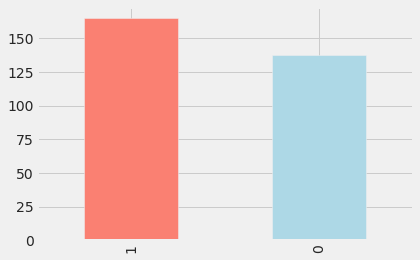

In [5]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have 165 people with heart disease and 138 people without heart disease, so our problem is balanced.

# Checking Null values

In [6]:
# Checking for messing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('****************************')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

****************************
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
****************************
sex : [1 0]
****************************
cp : [3 2 1 0]
****************************
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
****************************
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172

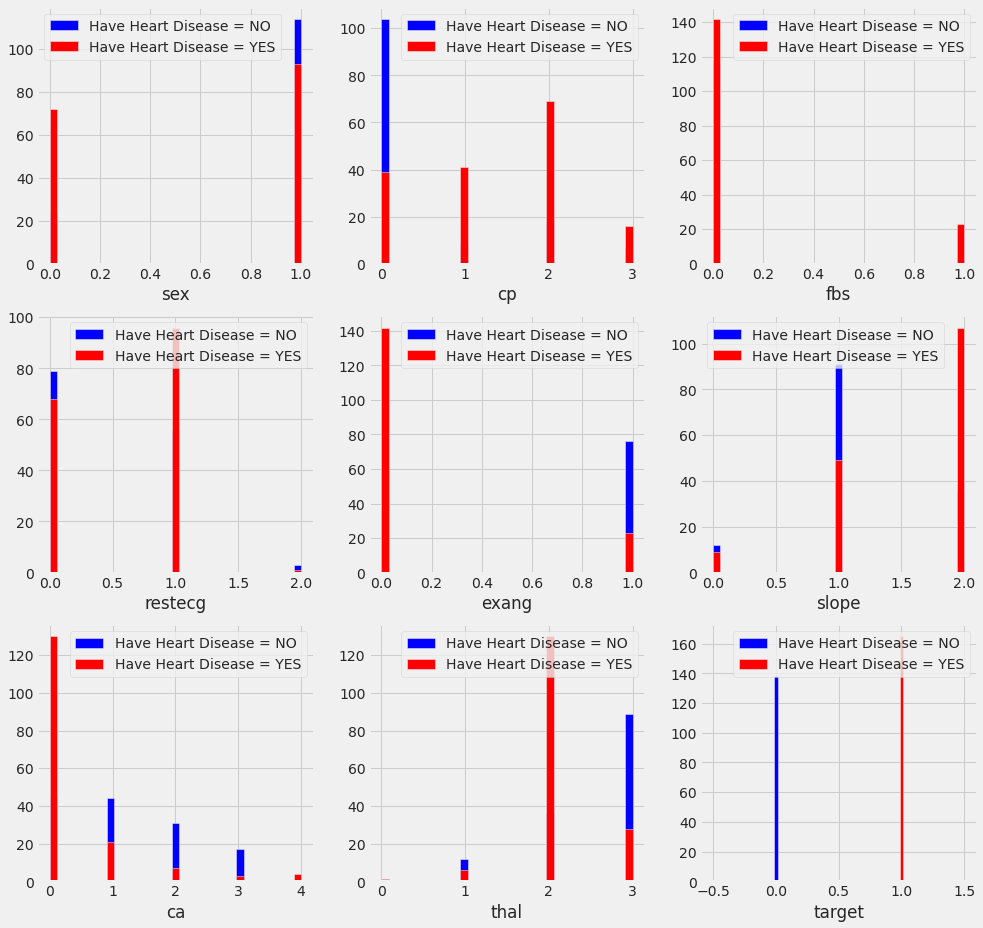

In [8]:
plt.figure(figsize=(15 , 15))
for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO')
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

Observations of the above plot:

1.cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

2.restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

3.exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

4.slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0.

5.ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

6.thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.




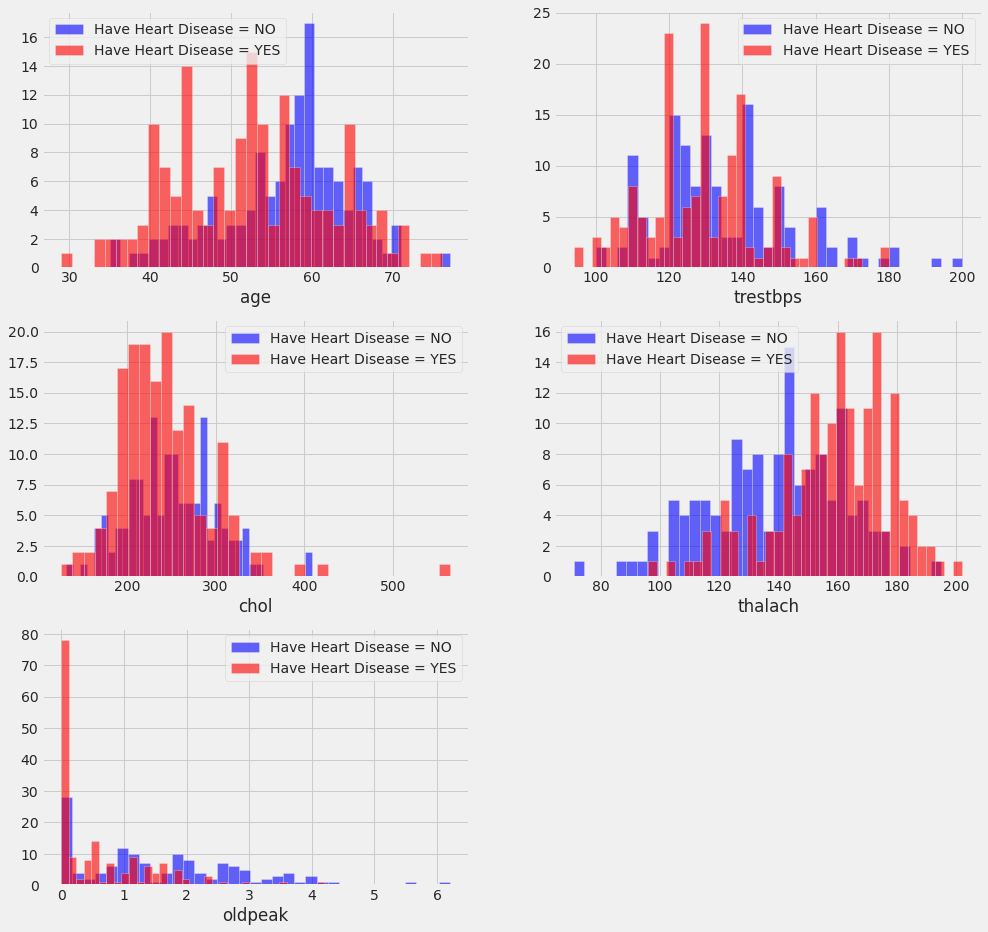

In [9]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations of the above plot:

1.trestbps: resting blood pressure anything above 130-140 is generally of concern

2.chol: greater than 200 is of concern.
thalach: People with a maximum of over 140 are more likely to have heart disease.
the old peak of exercise-induced ST depression vs. 

3.rest looks at heart stress during exercise an unhealthy heart will stress more.

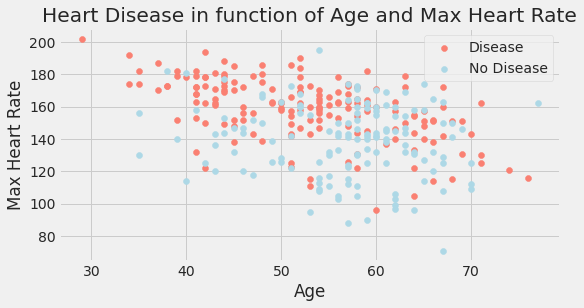

In [11]:
# Create another figure
plt.figure(figsize=(8, 4))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

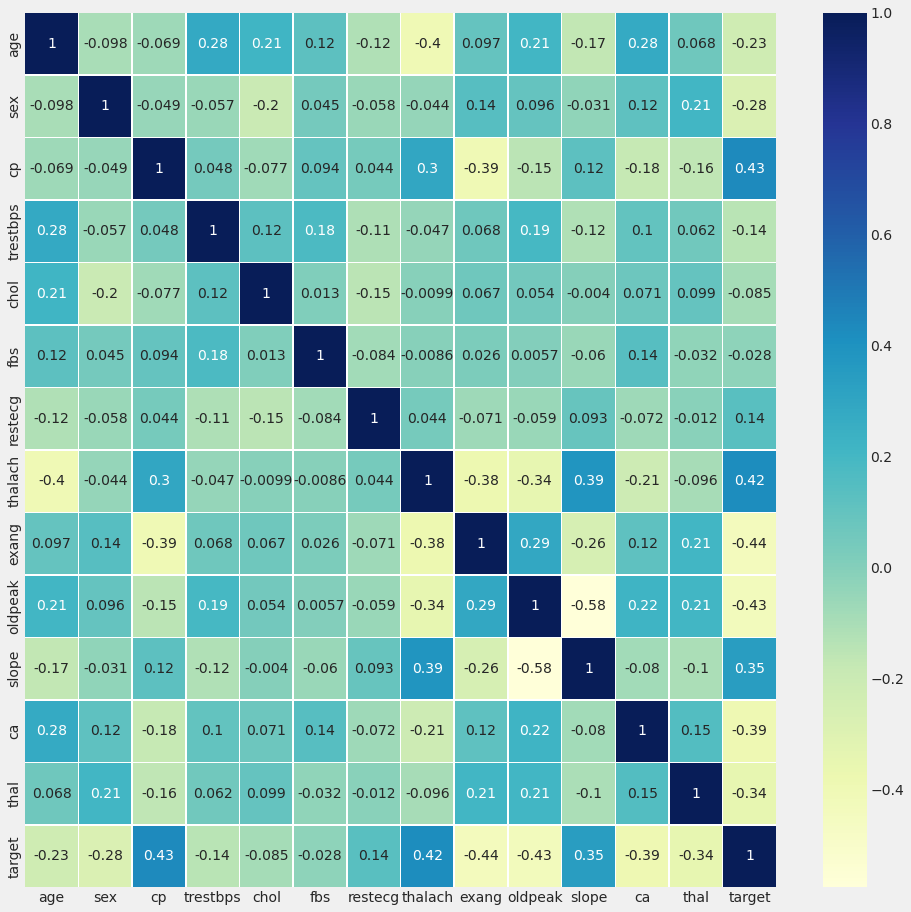

In [13]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True, linewidths=0.5,cmap="YlGnBu");

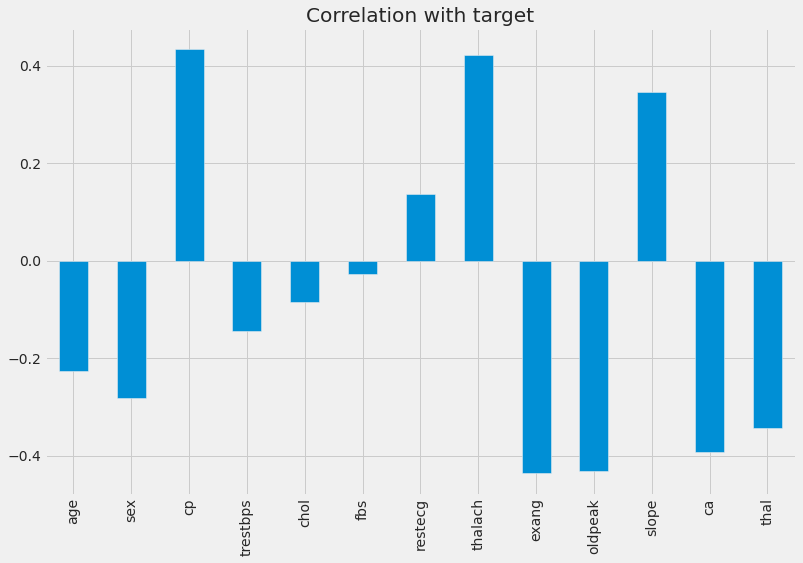

In [12]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

Observation from corelation:

1.fbs and chol are the least correlated with the target variable.

2.All other variables have a significant correlation with the target variable

# Data Processing

In [14]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = scaler.fit_transform(dataset[col_to_scale])

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

# print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

LogisticRegression(solver='liblinear')

In [18]:
y_pred_train = lr_clf.predict(X_train)
y_pred_test = lr_clf.predict(X_test)

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


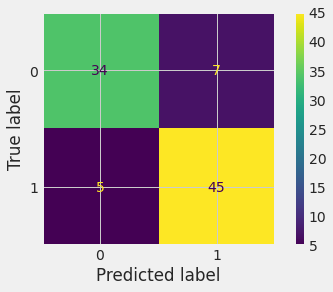

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_clf, X_test, y_test)

# Decesion Tree

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth = 6, min_samples_leaf = 3)

In [22]:
dtc_1.fit(X_train, y_train)
y_pred_train = dtc_1.predict(X_train)
y_pred = dtc_1.predict(X_test)

# Calculate the accuracy of the classifier
accuracy1 = accuracy_score(y_train, y_pred_train)
print("Accuracy on training:", accuracy1)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy on testing:", accuracy2)

Accuracy on training: 0.9198113207547169
Accuracy on testing: 0.7692307692307693


In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 5, min_samples_leaf = 3)
dtc_model.fit(X_train, y_train)
y_pred_train = dtc_model.predict(X_train)
y_pred_test = dtc_model.predict(X_test)

# Calculate the accuracy of the classifier

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing set:", accuracy)

Accuracy on training set: 0.9292452830188679
Accuracy on testing set: 0.7582417582417582


In [24]:
y_pred_train = dtc_model.predict(X_train)
y_pred_test = dtc_model.predict(X_test)

test_score = accuracy_score(y_test, dtc_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, dtc_model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree,92.924528,75.824176


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.83      0.70      0.76        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


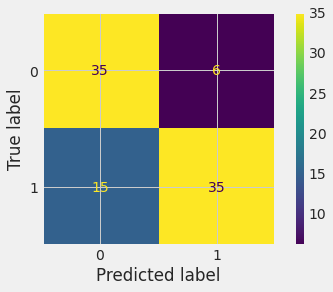

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_1, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


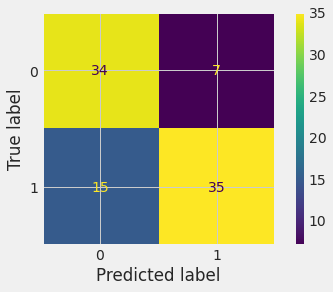

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_model, X_test, y_test)

As we can see both the model performs very well of the test set as it is giving almost the same accuracy in the test set as in the training set.